In [1]:
import numpy as np
import glob
from plotting import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.optimize as optimize
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('paper_labels_colors.mplstyle')
%matplotlib inline

In [2]:
# files with Uranus and Neptune semimajor axis, pericenter, and apocenter
# extracted from Tsiganis 2005 Figure 1
na = pd.read_csv("figure5-6/neptune0.csv",names=['x','y'])
uapo = pd.read_csv("figure5-6/uranus0.csv",names=['x','y'])
na2 = pd.read_csv("figure5-6/neptune3.csv",names=['x','y'])
ua2 = pd.read_csv("figure5-6/uranus3.csv",names=['x','y'])
na3 = pd.read_csv("figure5-6/neptune6.csv",names=['x','y'])
ua3 = pd.read_csv("figure5-6/uranus6.csv",names=['x','y'])
na4 = pd.read_csv("figure5-6/neptune_a.csv",names=['x','y'])
ua4 = pd.read_csv("figure5-6/uranus_a.csv",names=['x','y'])

napo = pd.read_csv("figure5-6/neptune1.csv",names=['x','y'])
ua = pd.read_csv("figure5-6/uranus1.csv",names=['x','y'])
napo2 = pd.read_csv("figure5-6/neptune4.csv",names=['x','y'])
uapo2 = pd.read_csv("figure5-6/uranus4.csv",names=['x','y'])
napo3 = pd.read_csv("figure5-6/neptune7.csv",names=['x','y'])
uapo3 = pd.read_csv("figure5-6/uranus7.csv",names=['x','y'])
napo4 = pd.read_csv("figure5-6/neptune_apo.csv",names=['x','y'])
uapo4 = pd.read_csv("figure5-6/uranus_apo.csv",names=['x','y'])

nperi = pd.read_csv("figure5-6/neptune2.csv",names=['x','y'])
uperi = pd.read_csv("figure5-6/uranus2.csv",names=['x','y'])
nperi2 = pd.read_csv("figure5-6/neptune5.csv",names=['x','y'])
uperi2 = pd.read_csv("figure5-6/uranus5.csv",names=['x','y'])
nperi4 = pd.read_csv("figure5-6/neptune_peri.csv",names=['x','y'])
uperi4 = pd.read_csv("figure5-6/uranus_peri.csv",names=['x','y'])

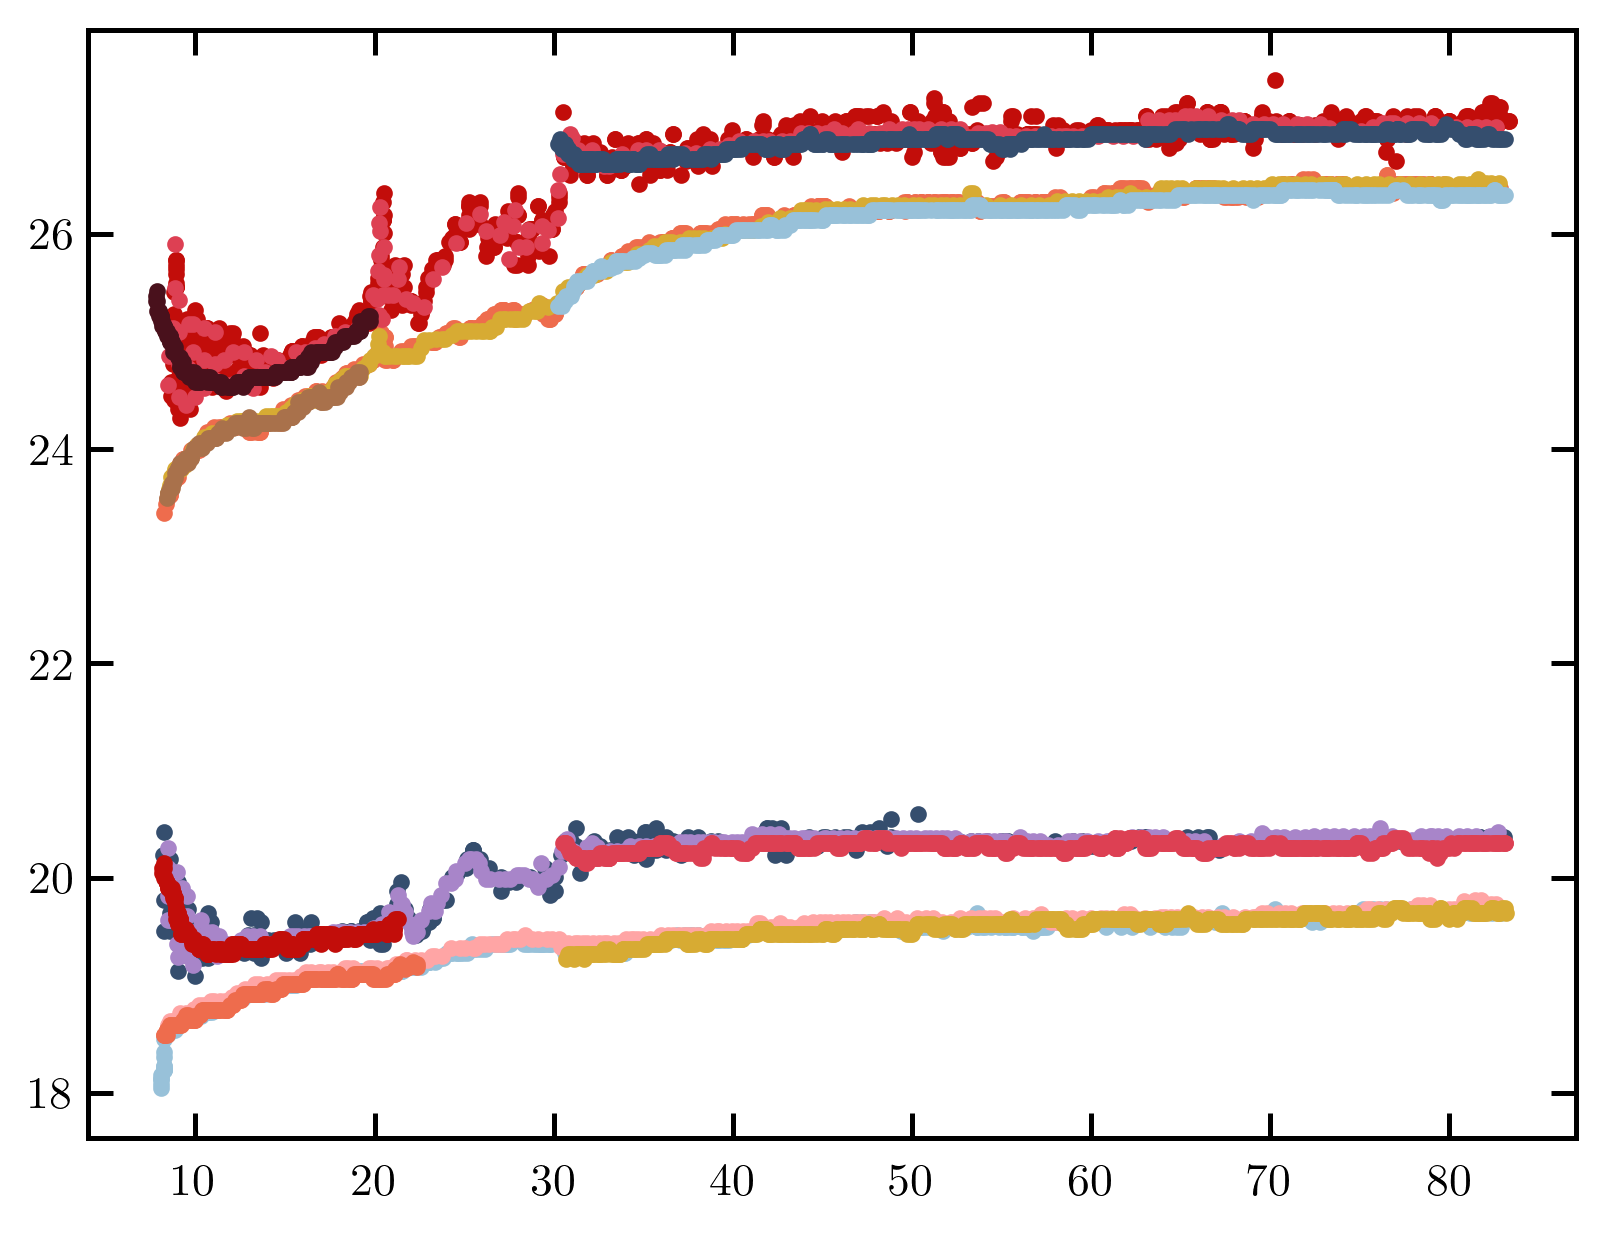

In [3]:
#### plot all the plot data points and check that they're similar enough
plt.plot(na3['x']/1e6,na3['y'],'.')
plt.plot(napo3['x']/1e6,napo3['y'],'.')
plt.plot(ua3['x']/1e6,ua3['y'],'.')
plt.plot(uapo3['x']/1e6,uapo3['y'],'.')

plt.plot(na4['x']/1e6,na4['y'],'.')
plt.plot(napo4['x']/1e6,napo4['y'],'.')
plt.plot(ua4['x']/1e6,ua4['y'],'.')
plt.plot(uapo4['x']/1e6,uapo4['y'],'.')

plt.plot(na2['x']/1e6,na2['y'],'.')
plt.plot(napo2['x']/1e6,napo2['y'],'.')
plt.plot(ua2['x']/1e6,ua2['y'],'.')
plt.plot(uapo2['x']/1e6,uapo2['y'],'.')

plt.plot(na['x']/1e6,na['y'],'.')
plt.plot(napo['x']/1e6,napo['y'],'.')
plt.plot(ua['x']/1e6,ua['y'],'.')
plt.plot(uapo['x']/1e6,uapo['y'],'.')
# plt.plot(nperi['x'],nperi['y'],'.')
plt.show()

In [4]:
# interpolate the data 
apo_np_int = interp.interp1d(napo3['x'],napo3['y'],fill_value = "extrapolate")
a_np_int = interp.interp1d(na3['x'],na3['y'],fill_value = "extrapolate")
apo_ur_int = interp.interp1d(uapo3['x'],uapo3['y'],fill_value = "extrapolate")
a_ur_int = interp.interp1d(ua3['x'],ua3['y'],fill_value = "extrapolate")

apo_np_int4 = interp.interp1d(napo4['x'],napo4['y'],fill_value = "extrapolate")
a_np_int4 = interp.interp1d(na4['x'],na4['y'],fill_value = "extrapolate")
apo_ur_int4 = interp.interp1d(uapo4['x'],uapo4['y'],fill_value = "extrapolate")
a_ur_int4 = interp.interp1d(ua4['x'],ua4['y'],fill_value = "extrapolate")

peri_np_int4 = interp.interp1d(nperi4['x'],nperi4['y'],fill_value = "extrapolate")
peri_ur_int4 = interp.interp1d(uperi4['x'],uperi4['y'],fill_value = "extrapolate")

apo_np_int2 = interp.interp1d(napo2['x'],napo2['y'],fill_value = "extrapolate")
a_np_int2 = interp.interp1d(na2['x'],na2['y'],fill_value = "extrapolate")
apo_ur_int2 = interp.interp1d(uapo2['x'],uapo2['y'],fill_value = "extrapolate")
a_ur_int2 = interp.interp1d(ua2['x'],ua2['y'],fill_value = "extrapolate")

apo_np_int0 = interp.interp1d(napo['x'],napo['y'],fill_value = "extrapolate")
a_np_int0 = interp.interp1d(na['x'],na['y'],fill_value = "extrapolate")
apo_ur_int0 = interp.interp1d(uapo['x'],uapo['y'],fill_value = "extrapolate")
a_ur_int0 = interp.interp1d(ua['x'],ua['y'],fill_value = "extrapolate")

In [5]:
# the time range for the early damping/migration phase and late phase
trange=np.logspace(6,8,10000)
trange = trange[(trange>8.6e6)&(trange<8e7)]

trange_early = trange[(trange<2e7)]
trange_late = trange[(trange>3e7)]

/Users/arceliahermosillo/anaconda3/envs/aumicplots1/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


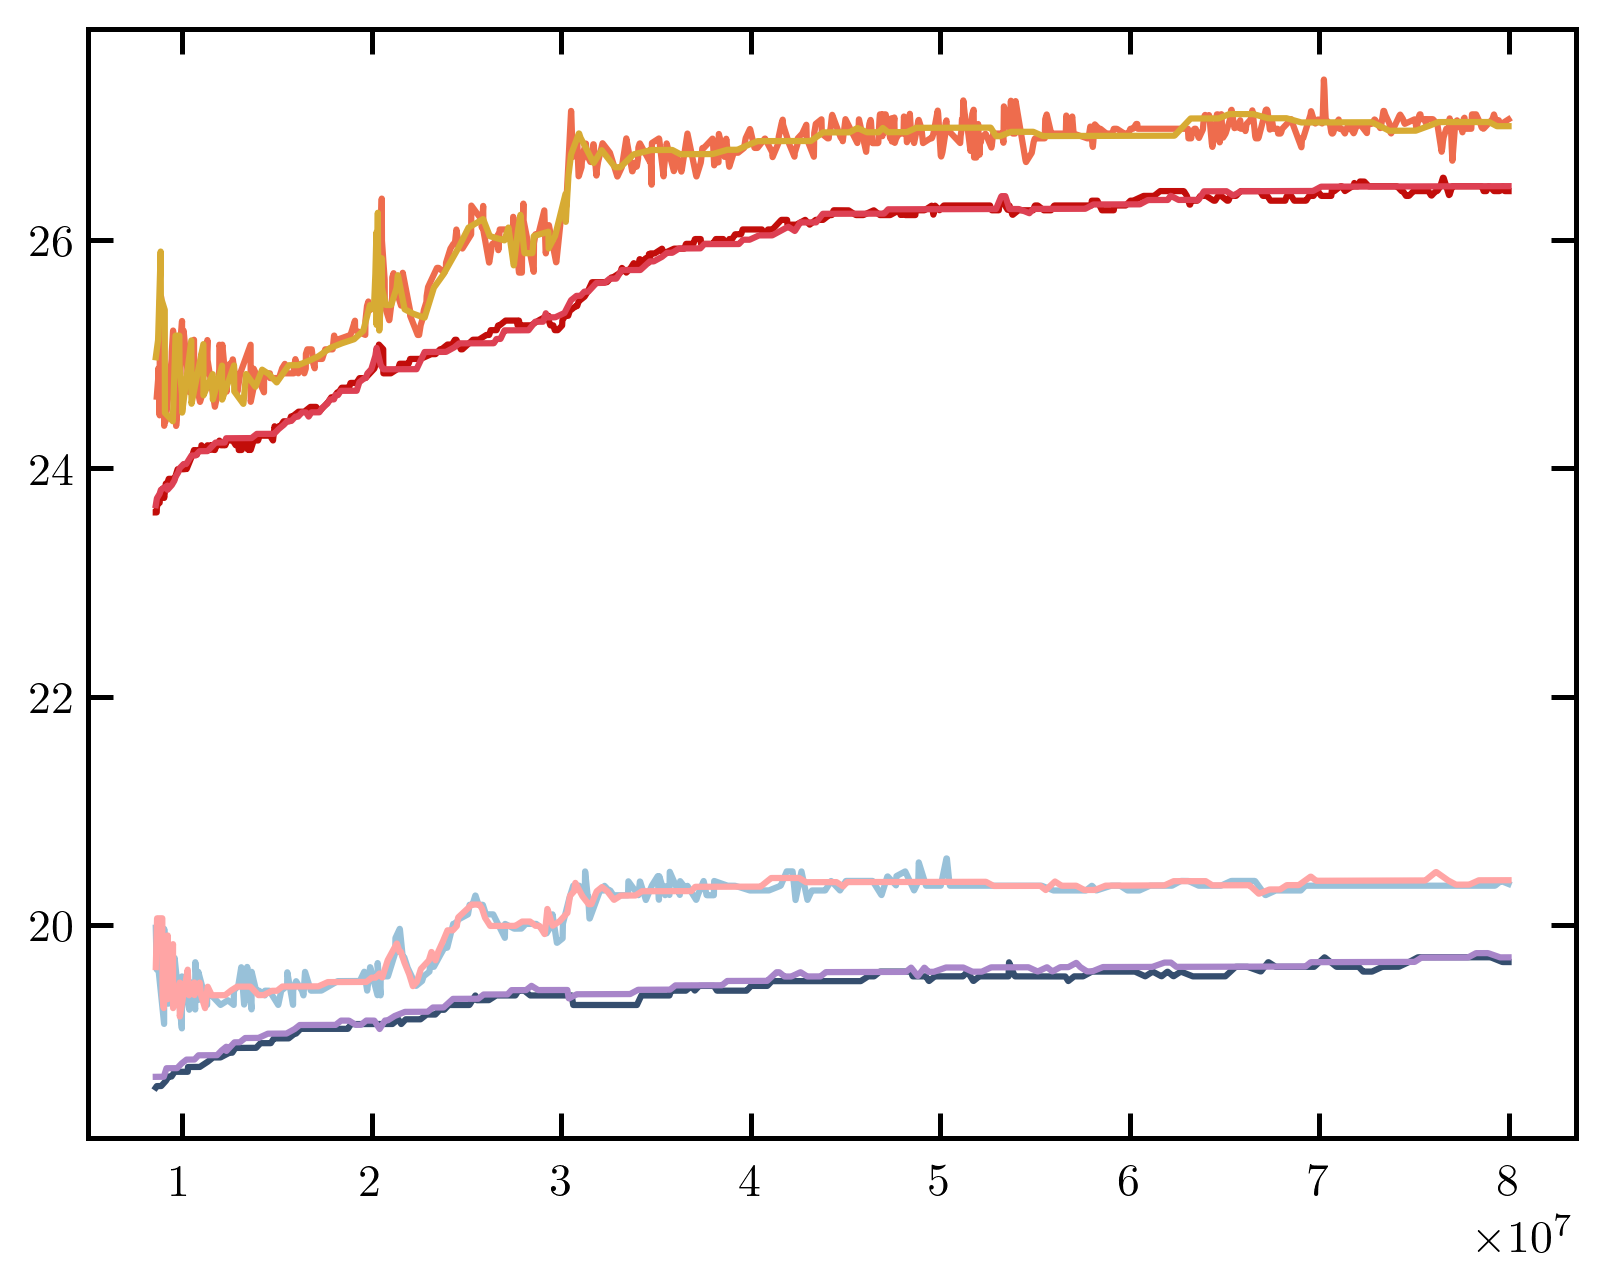

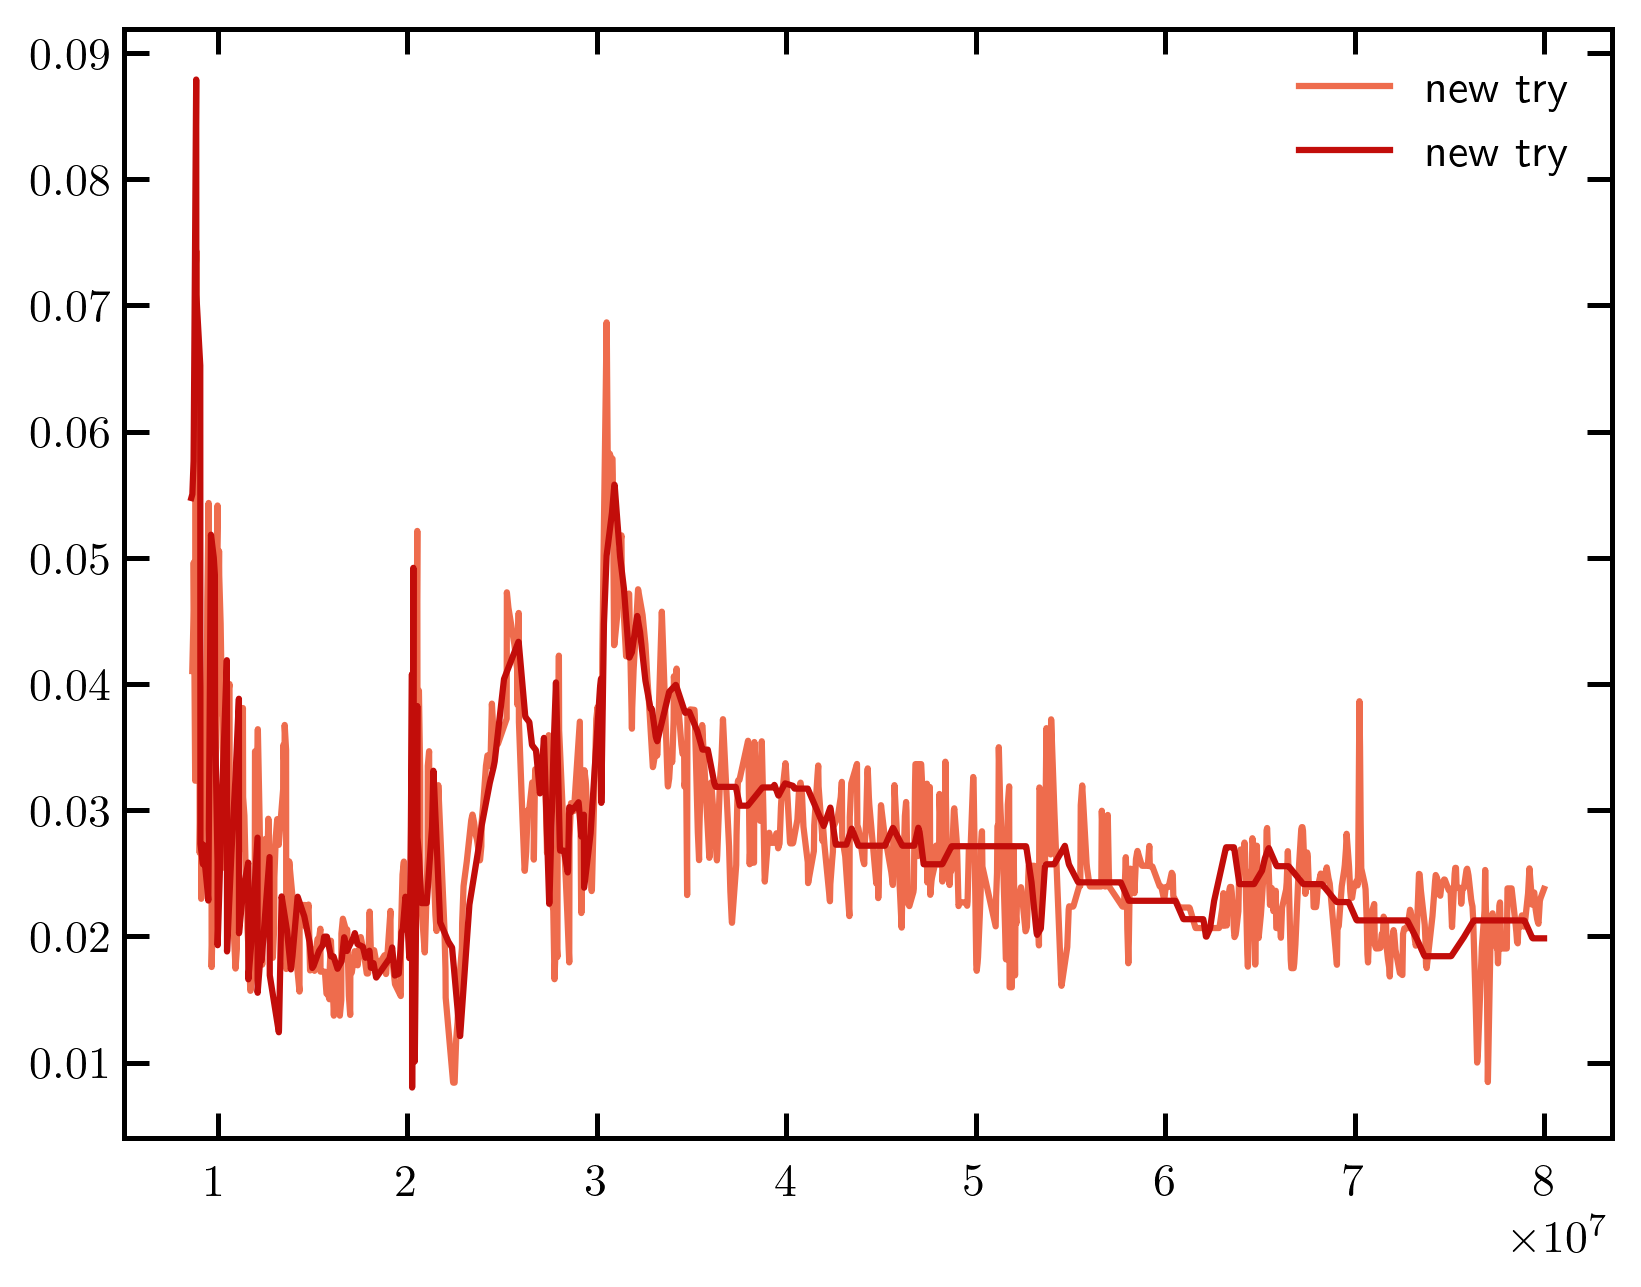

In [6]:
# plot the interpolation. how does it look for each data file/interpolation
# then use this to get the eccentricity

plt.figure()
plt.plot(trange,apo_np_int(trange))
plt.plot(trange,a_np_int(trange))
plt.plot(trange,apo_ur_int(trange))
plt.plot(trange,a_ur_int(trange))

plt.plot(trange,apo_np_int4(trange))
plt.plot(trange,a_np_int4(trange))
plt.plot(trange,apo_ur_int4(trange))
plt.plot(trange,a_ur_int4(trange))

# plt.plot(trange2,apo_np_int2(trange2))
# plt.plot(trange2,a_np_int2(trange2))
# plt.plot(trange2,apo_ur_int2(trange2))
# plt.plot(trange2,a_ur_int2(trange2))

# plt.plot(trange_late,apo_np_int0(trange_late))
# plt.plot(trange_late,a_np_int0(trange_late))
# plt.plot(trange_late,apo_ur_int0(trange_late))
# plt.plot(trange_late,a_ur_int0(trange_late))

plt.show()
plt.figure()
plt.plot(trange,apo_np_int(trange)/a_np_int(trange)-1,label="new try")
# plt.plot(trange,apo_ur_int(trange)/a_ur_int(trange)-1)

plt.plot(trange,apo_np_int4(trange)/a_np_int4(trange)-1,label="new try")
# plt.plot(trange,apo_ur_int4(trange)/a_ur_int4(trange)-1)
# plt.plot(trange,1-peri_np_int4(trange)/a_np_int4(trange))
# plt.plot(trange,1-peri_ur_int4(trange)/a_ur_int4(trange))

# plt.plot(trange_late,apo_np_int0(trange_late)/a_np_int0(trange_late)-1,label="old fit")
# plt.plot(trange_late,apo_ur_int0(trange_late)/a_ur_int0(trange_late)-1)
plt.legend()
plt.show()

In [7]:
def e_evolution(time,e0,dele,tau):
    return dele + e0 - dele*np.exp(-time/tau)

def return_a_fit_params(timearray,guess,a_int):
    time = timearray-timearray[0]
    fitparams, cov = optimize.curve_fit(e_evolution,time,a_int(timearray),p0=guess)
    return np.array(time),fitparams

def return_fit_params(timearray,guess,a_int,apo_int,peri_int=None,apo=True,peri=False):
    time = timearray-timearray[0]
    apoperi_params = []
    if apo: 
        fitparam_apo, cov = optimize.curve_fit(e_evolution,time,apo_int(timearray)/a_int(timearray)-1,p0=guess)
        apoperi_params.append(fitparam_apo)
    if peri:
        fitparam_peri, cov = optimize.curve_fit(e_evolution,time,1-peri_int(timearray)/a_int(timearray),p0=guess)
        apoperi_params.append(fitparam_peri)
    return np.array(time),np.array(apoperi_params)

## eccentricity fitting

In [8]:
trange=np.logspace(6,8,10000)
trange = trange[(trange>8.7e6)&(trange<8e7)]

trange_early = trange[(trange<2e7)]

trange_late = trange[(trange>3.05e7)]
trange_late_ur = trange[(trange>3.13e7)]

trange_late_short = trange[(trange>3.05e7)&(trange<4e7)]
print("late")
params = return_fit_params(trange_late,[0.08,-0.07,1e6],a_np_int4,apo_np_int4,peri_int=peri_np_int4,apo=True,peri=True)
time4,[np4_apofit,np4_perifit] = params
print(np4_apofit,np4_perifit)
params = return_fit_params(trange_late_ur,[0.08,-0.07,1e6],a_ur_int4,apo_ur_int4,peri_int=peri_ur_int4,apo=True,peri=True)
time4_ur,[ur4_apofit,ur4_perifit] = params
print(ur4_apofit,ur4_perifit)

params = return_fit_params(trange_late,[0.08,-0.07,3e7],a_np_int,apo_np_int,apo=True)
time3,[np3_apofit] = params
print(np3_apofit)
params = return_fit_params(trange_late_ur,[0.08,-0.07,3e7],a_ur_int,apo_ur_int,apo=True)
time3_ur,[ur3_apofit] = params
print(ur3_apofit)

params = return_fit_params(trange_late_short,[0.06,-0.03,5e6],a_np_int4,apo_np_int4,peri_int=peri_np_int4,apo=True,peri=True)
time_mid,[npmid_apofit,npmid_perifit] = params
# print(npmid_apofit,npmid_perifit)

print("early")
params = return_fit_params(trange_early,[0.08,-0.07,1e6],a_np_int4,apo_np_int4,peri_int=peri_np_int4,apo=True,peri=True)
time4_early,[np4_apofit,np4_perifit] = params
print(np4_apofit,np4_perifit)
params = return_fit_params(trange_early,[0.08,-0.07,1e6],a_ur_int4,apo_ur_int4,peri_int=peri_ur_int4,apo=True,peri=True)
time4_early,[ur4_apofit,ur4_perifit] = params
print(ur4_apofit,ur4_perifit)

params = return_fit_params(trange_early,[0.05,-0.02,1e6],a_np_int,apo_np_int,apo=True)
time3_early,[np3_apofit] = params
print(np3_apofit)
params = return_fit_params(trange_early,[0.05,-0.02,1e6],a_ur_int,apo_ur_int,apo=True)
time3_early,[ur3_apofit] = params
print(ur3_apofit)

late
[ 4.84912659e-02 -2.57806422e-02  7.96604149e+06] [ 4.49803377e-02 -2.37246738e-02  6.11179532e+06]
[ 4.56554326e-02 -1.48915492e-02  3.29750648e+07] [ 5.08525743e-02 -2.16816226e-02  1.99771121e+07]
[ 5.07730064e-02 -2.72995629e-02  5.38050457e+06]
[ 4.96318684e-02 -2.44723122e-02  4.57243500e+07]
early
[ 6.78368993e-02 -4.82155808e-02  8.85545170e+05] [ 5.82583417e-02 -4.30540855e-02  1.56141018e+06]
[ 6.54993074e-02 -4.50688781e-02  1.18413239e+06] [ 5.16284734e-02 -3.23046336e-02  1.63442120e+06]
[ 4.49642365e-02 -2.75189095e-02  2.76604705e+06]
[ 5.12350348e-02 -3.17685131e-02  2.62381015e+06]


In [9]:
params = return_fit_params(trange_late,[0.08,-0.07,1e6],a_np_int0,apo_np_int0)
time0,[np0_apofit] = params
np0_apofit
params = return_fit_params(trange_late,[0.08,-0.07,1e6],a_ur_int0,apo_ur_int0)
time0,[ur0_apofit] = params
ur0_apofit
# params = return_fit_params(trange_early,[0.08,-0.07,1e6],a_ur_int,apo_ur_int,apo=True)
# time0,ur0_apofit = params

array([ 4.90657913e-02, -2.13228842e-02,  3.20770760e+07])

the fits favor small initial eccentricities or large final eccentricites 

Since data points were extracted from the plot with software, we expect these fits to be mere estimates

We choose values that are not far off from the fits

In [10]:
fig,ax=plt.subplots(2,1,figsize=(3.3,4))
ax=ax.ravel()
ax[1].plot(trange/1e6,apo_np_int(trange)/a_np_int(trange)-1,color="#5075A5")
# plt.plot(trange_late,apo_np_int0(trange_late)/a_np_int0(trange_late)-1)
ax[0].plot(trange/1e6,apo_ur_int(trange)/a_ur_int(trange)-1,color = "#5075A5")

# ax[1].plot(trange/1e6,apo_np_int4(trange)/a_np_int4(trange)-1)
# ax[0].plot(trange/1e6,apo_ur_int4(trange)/a_ur_int4(trange)-1)

# ax[1].plot(trange/1e6,1-peri_np_int4(trange)/a_np_int4(trange))
# ax[0].plot(trange/1e6,1-peri_ur_int4(trange)/a_ur_int4(trange))


# plt.plot(trange_early,e_evolution(trange_early-trange_early[0],*[ 0.05,0.0180793336-0.05,  1.2e6]))
# ax[1].plot(trange_early/1e6,e_evolution(time4_early,*np3_apofit),rasterized=True)
# ax[0].plot(trange_early/1e6,e_evolution(time4_early,*ur3_apofit),rasterized=True)
# ax[1].plot(trange_early/1e6,e_evolution(time4_early,*[0.05,0.018-0.05,2e6]),rasterized=True)
# ax[0].plot(trange_early/1e6,e_evolution(time4_early,*[0.05,0.018-0.05,2e6]),rasterized=True)
ax[1].plot(trange_early/1e6,e_evolution(time4_early,*[0.06,0.018-0.06,1.5e6]),rasterized=True,color='k',linestyle='--')
ax[0].plot(trange_early/1e6,e_evolution(time4_early,*[0.06,0.02-0.06,1.5e6]),rasterized=True,color='k',linestyle='--')

ax[0].plot(trange_late_ur/1e6,e_evolution(time3_ur,*[0.054,0.03-0.054,2e7]),rasterized=True,color='k',linestyle='--')
# plt.plot(trange_late,e_evolution(time4,*np4_perifit))
ax[1].plot(trange_late/1e6,e_evolution(time4,*[0.055,0.022-0.055,6e6]),color='k',linestyle='--')   ## final timescale to evolve.
# plt.plot(trange_late_short,e_evolution(time_mid,*npmid_apofit))
# plt.plot(trange_late,e_evolution(time4,*[0.05,0.021-0.05,8e6]))
ax[1].set_xlabel("time (Myr)")
fig.supylabel("eccentricity")
ax[0].annotate("Uranus",(55,0.06))
ax[1].annotate("Neptune",(55,0.06))
# plt.tight_layout()
fig.subplots_adjust(hspace=0.0,left = 0.2,top=0.98,right=0.98,bottom=0.14) 
plt.savefig("fig5.pdf",dpi=300)
print("so for uranus early damping: initial e = 0.06, final e = 0.02, tau = 1.5e6")
print("so for neptune early damping: initial e = 0.06, final e = 0.018, tau = 1.5e6")

print("so for uranus late damping: initial e = 0.054, final e = 0.03, tau = 2e7")
print("so for neptune laet damping: initial e = 0.055, final e = 0.022, tau = 6e6")
plt.close()

so for uranus early damping: initial e = 0.06, final e = 0.02, tau = 1.5e6
so for neptune early damping: initial e = 0.06, final e = 0.018, tau = 1.5e6
so for uranus late damping: initial e = 0.054, final e = 0.03, tau = 2e7
so for neptune laet damping: initial e = 0.055, final e = 0.022, tau = 6e6


## semi major axis fitting

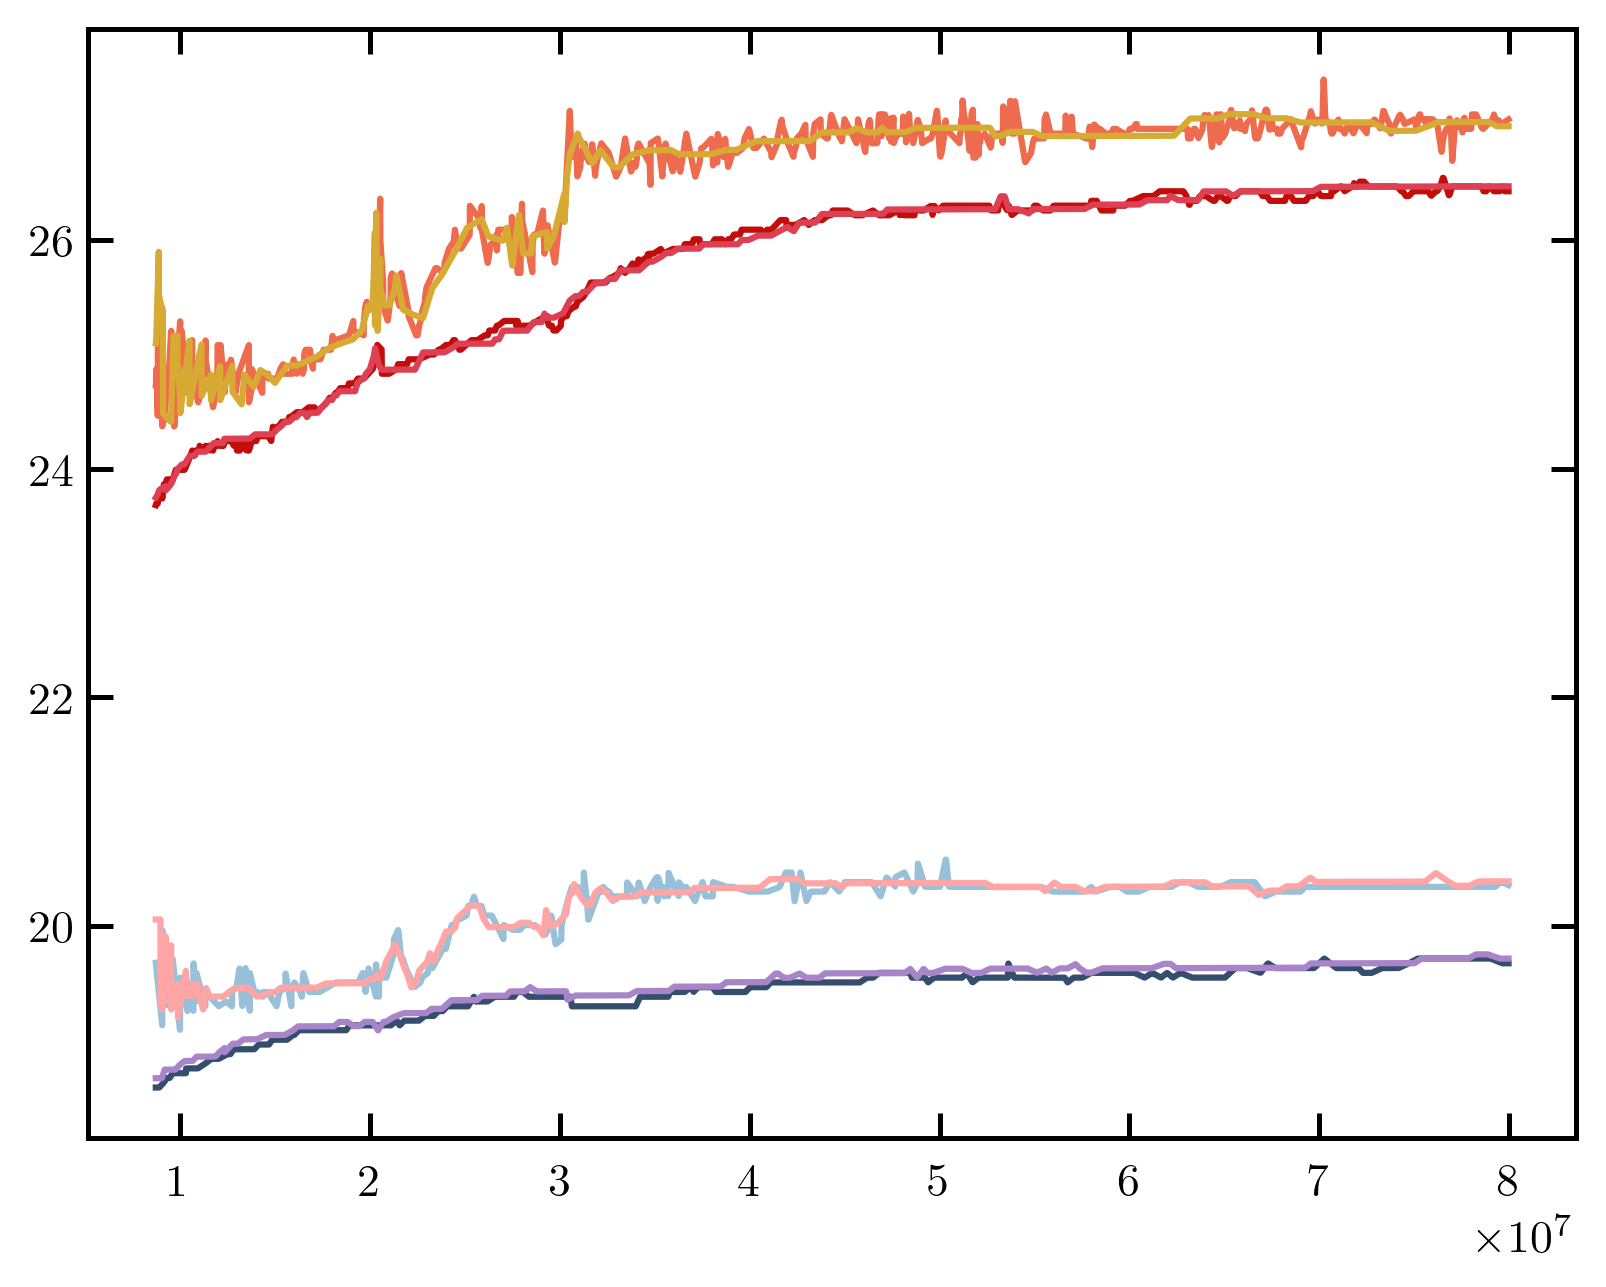

In [11]:
plt.figure()
plt.plot(trange,apo_np_int(trange))
plt.plot(trange,a_np_int(trange))
plt.plot(trange,apo_ur_int(trange))
plt.plot(trange,a_ur_int(trange))

plt.plot(trange,apo_np_int4(trange))
plt.plot(trange,a_np_int4(trange))
plt.plot(trange,apo_ur_int4(trange))
plt.plot(trange,a_ur_int4(trange))

# plt.plot(trange2,apo_np_int2(trange2))
# plt.plot(trange2,a_np_int2(trange2))
# plt.plot(trange2,apo_ur_int2(trange2))
# plt.plot(trange2,a_ur_int2(trange2))

# plt.plot(trange_late,apo_np_int0(trange_late))
# plt.plot(trange_late,a_np_int0(trange_late))
# plt.plot(trange_late,apo_ur_int0(trange_late))
# plt.plot(trange_late,a_ur_int0(trange_late))

plt.show()

##### 

In [12]:
trange=np.logspace(6,8,10000)
trange = trange[(trange>8.7e6)&(trange<8e7)]

trange_early = trange[(trange<2e7)]

trange_late = trange[(trange>3.05e7)]
trange_late_ur = trange[(trange>3.13e7)]

trange_late_short = trange[(trange>3.05e7)&(trange<4e7)]

print("early")
params = return_a_fit_params(trange_early,[23,2,1e7],a_np_int4)
time4_early,np4_a_fit = params
print(np4_a_fit)
params = return_a_fit_params(trange_early,[19,0.2,1e7],a_ur_int4)
time4_early,ur4_a_fit= params
print(ur4_a_fit)

params = return_a_fit_params(trange_early,[23,2,1e7],a_np_int)
time3_early,np3_a_fit = params
print(np3_a_fit)
params = return_a_fit_params(trange_early,[19,0.2,1e7],a_ur_int)
time3_early,ur3_a_fit = params
print(ur3_a_fit)


print("late")
params = return_a_fit_params(trange_late,[23,2,1e7],a_np_int4)
time4_late,np4_a_late_fit = params
print(np4_a_late_fit)
params = return_a_fit_params(trange_late,[19,0.2,1e7],a_ur_int4)
time4_late,ur4_a_late_fit= params
print(ur4_a_late_fit)

params = return_a_fit_params(trange_late,[23,2,1e7],a_np_int)
time3_late,np3_a_late_fit = params
print(np3_a_late_fit)
params = return_a_fit_params(trange_late,[19,0.2,1e7],a_ur_int)
time3_late,ur3_a_late_fit = params
print(ur3_a_late_fit)


early
[2.38557641e+01 2.02217457e+00 1.98633325e+07]
[1.86650020e+01 6.03076049e-01 6.19494925e+06]
[2.38649018e+01 5.80123267e+00 6.55642155e+07]
[1.85956122e+01 6.96823048e-01 7.28211276e+06]
late
[2.55137698e+01 9.42180055e-01 1.18931660e+07]
[1.93612921e+01 3.37409379e-01 1.59519351e+07]
[2.54876274e+01 9.23710379e-01 9.55670369e+06]
[1.92867338e+01 3.87109609e-01 1.71700495e+07]


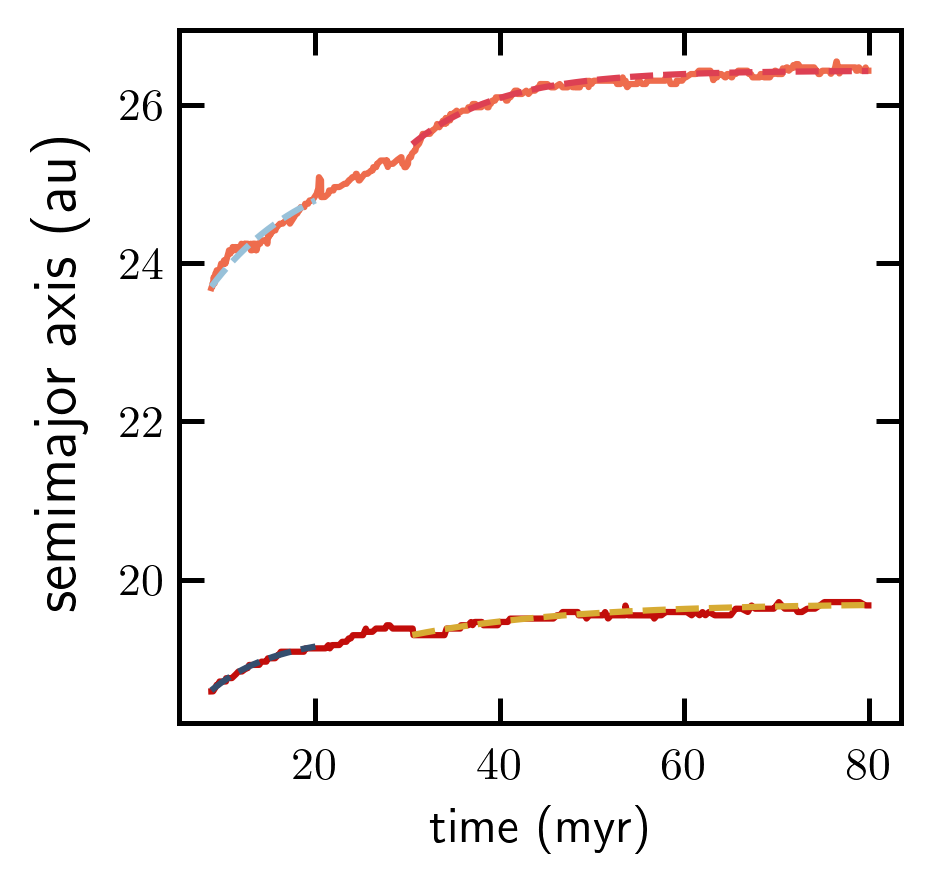

so for uranus early migration: initial a = 18.6, final a = 19.3, tau = 7.2e6
so for uranus early damping: initial e = 0.06, final e = 0.02, tau = 1.5e6
so for neptune early migration: initial a = 23.7, final a = 25.4, tau = 1.1e7
so for neptune early damping: initial e = 0.06, final e = 0.018, tau = 1.5e6
so for uranus late migration: initial a = 19.3, final a = 19.7, tau = 1.7e7
so for uranus late damping: initial e = 0.054, final e = 0.03, tau = 2e7
so for neptune laet migration: initial a = 25.5, final a = 26.43, tau = 9.6e6
so for neptune laet damping: initial e = 0.055, final e = 0.022, tau = 6e6


In [13]:
fig,ax=plt.subplots(1,1,figsize=(3.3,3))
ax.plot(trange/1e6,a_np_int(trange))
# plt.plot(trange_late,apo_np_int0(trange_late)/a_np_int0(trange_late)-1)
ax.plot(trange/1e6,a_ur_int(trange))

# ax.plot(trange/1e6,a_np_int4(trange))
# ax.plot(trange/1e6,a_ur_int4(trange))

# ax[1].plot(trange/1e6,1-peri_np_int4(trange)/a_np_int4(trange))
# ax[0].plot(trange/1e6,1-peri_ur_int4(trange)/a_ur_int4(trange))


# plt.plot(trange_early,e_evolution(trange_early-trange_early[0],*[ 0.05,0.0180793336-0.05,  1.2e6]))
# ax.plot(trange_early/1e6,e_evolution(time4_early,*np3_a_fit),rasterized=True)
ax.plot(trange_early/1e6,e_evolution(time3_early,*[23.7,1.7,1.1e7]),'--',rasterized=True)
# ax.plot(trange_early/1e6,e_evolution(time3_early,*[23.7,1,6e6]),'--',rasterized=True)
ax.plot(trange_early/1e6,e_evolution(time3_early,*[18.6,0.7,7.2e6]),'--',rasterized=True)
# ax.hlines(19.3,10,80)
# 1.86650020e+01 6.03076049e-01 6.19494925e+06 or 1.85956122e+01 6.96823048e-01 7.28211276e+06
# ax.plot(trange_late/1e6,e_evolution(time3_late,*ur3_a_late_fit),'--',rasterized=True)
# ax.plot(trange_late/1e6,e_evolution(time3_late,*np3_a_late_fit),'--',rasterized=True)
ax.plot(trange_late/1e6,e_evolution(time3_late,*[19.3,0.4,1.7e7]),'--',rasterized=True)
ax.plot(trange_late/1e6,e_evolution(time3_late,*[25.5,0.93,9.6e6]),'--',rasterized=True)

ax.set_xlabel("time (myr)")
fig.supylabel("semimajor axis (au)")
ax.annotate("uranus",(55,0.06))
ax.annotate("neptune",(55,0.06))
# plt.tight_layout()
fig.subplots_adjust(hspace=0.0,left = 0.17) 
# plt.savefig("semimajoraxis-tsiganis-fit.pdf",dpi=300)
plt.show()
plt.close()

print("so for uranus early migration: initial a = 18.6, final a = 19.3, tau = 7.2e6")
print("so for uranus early damping: initial e = 0.06, final e = 0.02, tau = 1.5e6")
print("so for neptune early migration: initial a = 23.7, final a = 25.4, tau = 1.1e7")
print("so for neptune early damping: initial e = 0.06, final e = 0.018, tau = 1.5e6")

print("so for uranus late migration: initial a = 19.3, final a = 19.7, tau = 1.7e7")
print("so for uranus late damping: initial e = 0.054, final e = 0.03, tau = 2e7")
print("so for neptune laet migration: initial a = 25.5, final a = 26.43, tau = 9.6e6")
print("so for neptune laet damping: initial e = 0.055, final e = 0.022, tau = 6e6")

jupiter: 5.1499999999999995 0.051999999999999845 2.303574691300065 164.549632014698 163.00617776439205 285.15444912504694
saturn: 8.75 0.09999999999999998 4.435644327430073 308.323070578049 -113.431179379431 73.12253687867839
uranus: 18.6 0.05999999999999995 6.411011650000002 179.91084441244502 -84.33863300014004 243.16430414458898
neptune: 23.700000000000006 0.05999999999999994 5.87986423999996 126.10012925963613 10.34893778790972 90.00687574667393
jupiter: 5.149999999999999 0.05199999999999987 2.303574691300065 187.76186544726505 151.321420126077 36.77903189850162
saturn: 8.75 0.10000000000000013 4.435644327430073 89.47266399929562 -96.97803278495799 120.99844954937198
uranus: 19.3 0.054 6.411011650000002 220.26364100809923 -52.398425345285006 133.37898379386382
neptune: 25.49999999999999 0.054999999999999896 5.87986423999996 187.8008964943432 36.546770403336104 269.37431403324683


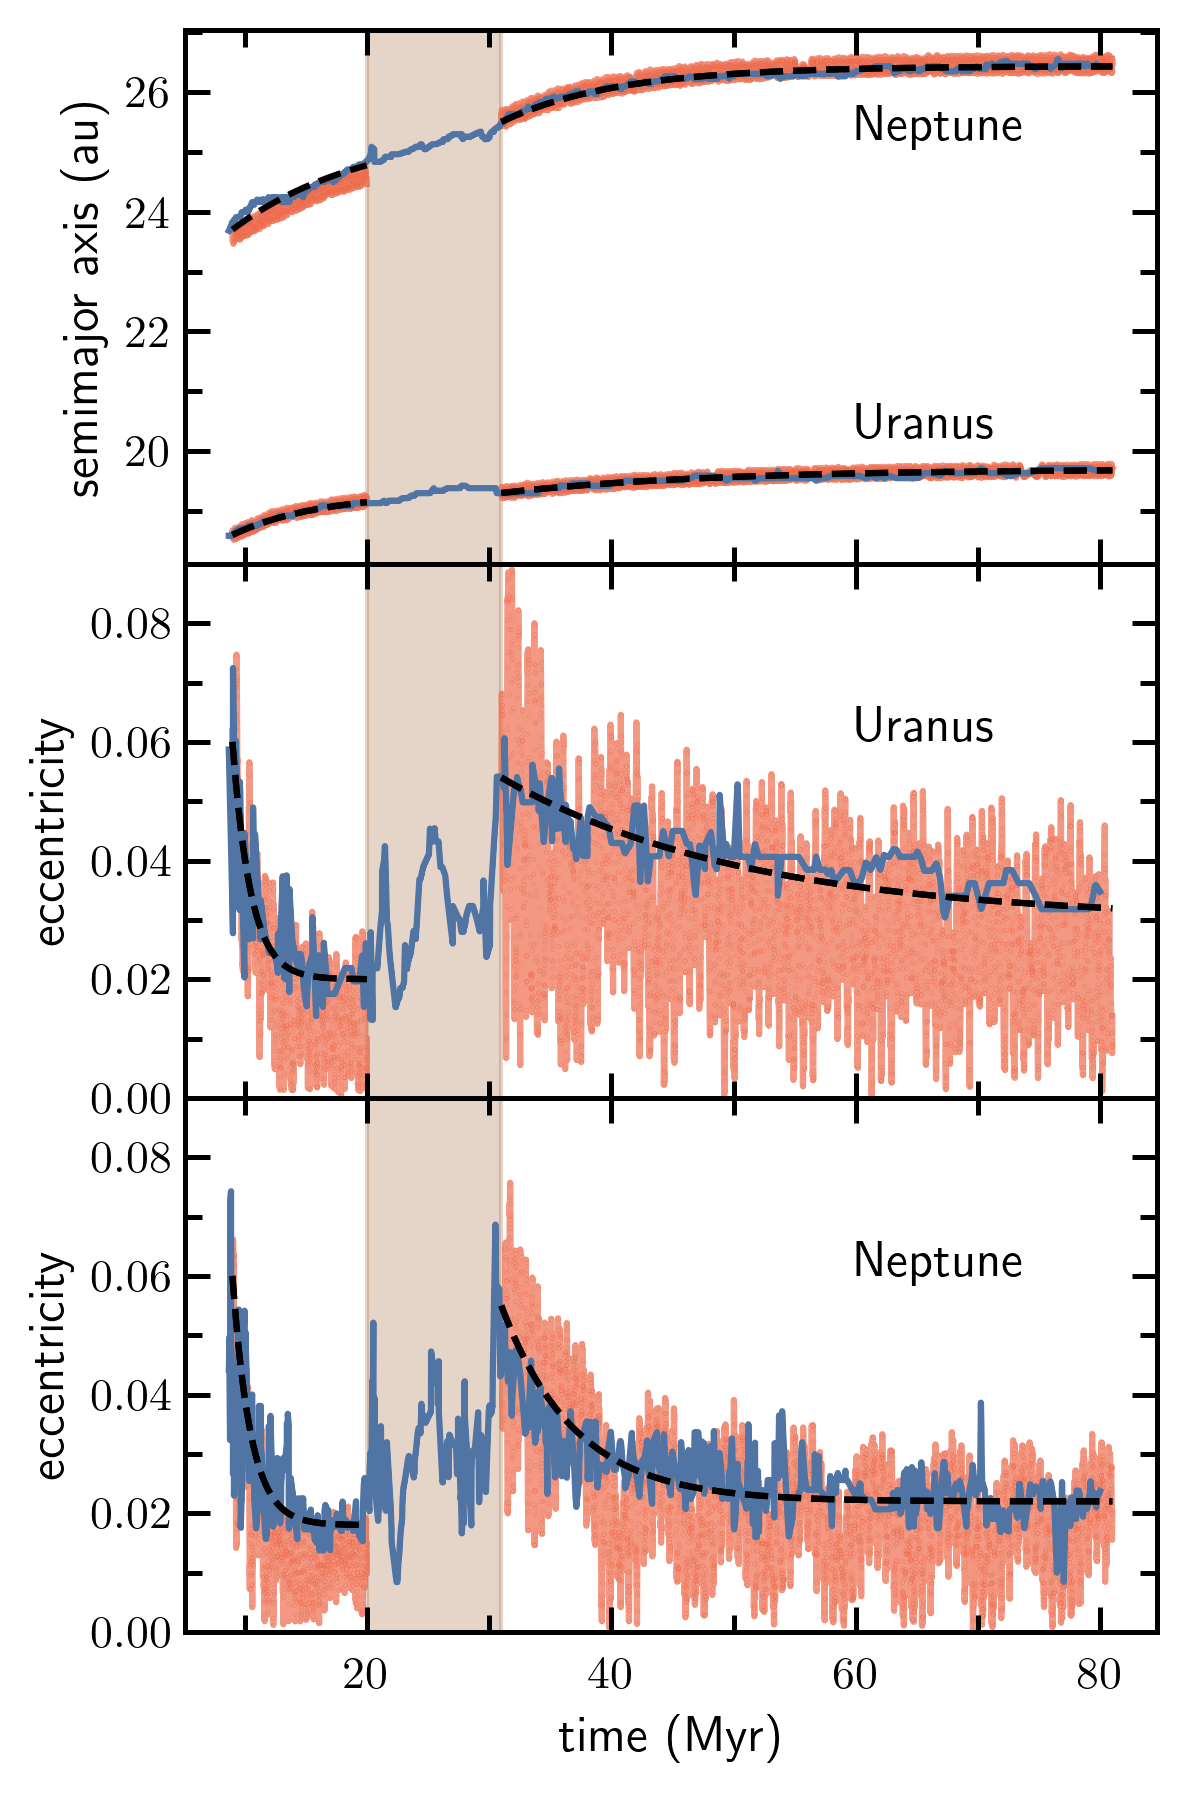

In [14]:
n_apo_params_late = [0.055,0.022-0.055,6e6]
n_apo_params_early = [0.06,0.018-0.06,1.5e6]
u_apo_params_late = [0.054,0.03-0.054,2e7]
u_apo_params_early = [0.06,0.02-0.06,1.5e6]

n_a_late=[25.5,0.93,9.6e6]
u_a_late = [19.3,0.4,1.7e7]
n_a_early =  [23.7,1.7,1.1e7]
u_a_early = [18.6,0.7,7.2e6]

tapo_early = np.linspace(0,2e7-9e6,1000)
tapo_late = np.linspace(0,5e7,10000)
indxPlanets=[2,3]


tsigfitcolor = '#5075A5'
simulationcolor = '#EE6C4D'
dampfunctioncolor = 'k'

# "#EE6C4D"
# "#C20D0A"


fig,ax=plt.subplots(3,1,figsize=(4,6),sharex=True)
# ax[0].plot((tapo_early+9e6)/1e6,e_evolution(tapo_early,*[23.7,1.8,1e7]),'--',color = dampfunctioncolor)
ax[0].plot((tapo_early+9e6)/1e6,e_evolution(tapo_early,*n_a_early),'--')
ax[0].plot((tapo_late+3.1e7)/1e6,e_evolution(tapo_late,*n_a_late),'--',color = dampfunctioncolor)
ax[0].plot((tapo_early+9e6)/1e6,e_evolution(tapo_early,*u_a_early),'--',color = dampfunctioncolor)
ax[0].plot((tapo_late+3.1e7)/1e6,e_evolution(tapo_late,*u_a_late),'--',color = dampfunctioncolor)

ax[0].plot(trange/1e6,a_np_int(trange),marker='.',linestyle=None,markersize=0.2,rasterized=True,zorder=-3,color = tsigfitcolor)
ax[0].plot(trange/1e6,a_ur_int(trange),marker='.',linestyle=None,markersize=0.2,rasterized=True,zorder=-3,color = tsigfitcolor)

ax[1].plot((tapo_early+9e6)/1e6,e_evolution(tapo_early,*u_apo_params_early),'--',color=dampfunctioncolor)
ax[1].plot((tapo_late+3.1e7)/1e6,e_evolution(tapo_late,*u_apo_params_late),'--',color=dampfunctioncolor)
ax[2].plot((tapo_early+9e6)/1e6,e_evolution(tapo_early,*n_apo_params_early),'--',color=dampfunctioncolor)
ax[2].plot((tapo_late+3.1e7)/1e6,e_evolution(tapo_late,*n_apo_params_late),'--',color=dampfunctioncolor)

ax[1].plot(trange/1e6,apo_ur_int(trange)/a_ur_int(trange)-1,marker='.',linestyle=None,markersize=0.2,rasterized=True,zorder=-3,color=tsigfitcolor)
ax[2].plot(trange/1e6,apo_np_int(trange)/a_np_int(trange)-1,marker='.',linestyle=None,markersize=0.2,rasterized=True,zorder=-3,color=tsigfitcolor)


file = "../4planet-UrNep-early-damp-mig-fig6/tsiganis-dampboth-early.txt"
nP = 4
force_trange=None
data = get_data(file,nP,rebound=True)
t = data[0]['Time']/(2*np.pi)
# only get data for given time frame 
mask = t<2e7-9e6
t = t[mask]
data = data[:,mask]
nt = len(data[0])
das = np.zeros(nP)
des = np.zeros(nP)
dis = np.zeros(nP)

aeqs = np.empty((nP,nt))
eeqs = np.empty((nP,nt))
ieqs = np.empty((nP,nt))

t_dat = data[0]['Time']
if force_trange is not None: 
    t_dat = t_dat[(t_dat>force_trange[0])&(t_dat<force_trange[1])]
else:
    pass

print("jupiter:",data[0]['a'][0],data[0]['e'][0],data[0]['i'][0]*180/np.pi,data[0]['peri'][0]*180/np.pi,data[0]['node'][0]*180/np.pi,data[0]['f'][0]*180/np.pi)
print("saturn:",data[1]['a'][0],data[1]['e'][0],data[1]['i'][0]*180/np.pi,data[1]['peri'][0]*180/np.pi,data[1]['node'][0]*180/np.pi,data[1]['f'][0]*180/np.pi)
print("uranus:",data[2]['a'][0],data[2]['e'][0],data[2]['i'][0]*180/np.pi,data[2]['peri'][0]*180/np.pi,data[2]['node'][0]*180/np.pi,data[2]['f'][0]*180/np.pi)
print("neptune:",data[3]['a'][0],data[3]['e'][0],data[3]['i'][0]*180/np.pi,data[3]['peri'][0]*180/np.pi,data[3]['node'][0]*180/np.pi,data[3]['f'][0]*180/np.pi)

# expEq = np.array(([5,5,5,5,5],[5,5,5,5,5],[0,0,5,5,5],[0,0,5,5,5]))

# taus = np.array(([0.0, 0.0, 0.0, 0.0, 0.0],
# [0.0, 0.0, 0.0, 0.0, 0.0],
# [8.3e6, 1.4e6,0.0,0.0,0.0],
# [5.4e6, 1e6, 5.13081856e6, 0, 0]))*2*np.pi

# fparams = np.array(([5.15, 8.75, 19.3,24.7],
#                     [0.05,0.1,0.017,0.017],
#                     np.array([2.3035746913,4.43564432743,1.41101165,1.76986424])*np.pi/180,
#                     np.array([273,263,263,358])*np.pi/180,
#                     np.array([100,75,141,214])*np.pi/180))

expEq = np.array(([None,None,None,None,None],
[None,None,None,None,None],
[0,0,None,None,None],
[0,0,None,None,None]))
taus = np.array(([0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0],
[7.2e6, 1.5e6,0.0,0.0,0.0],
[1.1e7, 1.5e6, 0, 0, 0]))*2*np.pi

fparams = np.array(([5.15, 8.75, 19.3,25.4],
                    [0.05,0.1,0.02,0.018],
                    np.array([2.3035746913,4.43564432743,1.41101165,1.76986424])*np.pi/180,
                    np.array([273,263,263,358])*np.pi/180,
                    np.array([100,75,141,214])*np.pi/180))

finalParam=fparams
tau = taus
eqBool=expEq
verbose=False

for j,i in enumerate(indxPlanets):
#         print(i)
    das[j] = finalParam[0][i] - data[i]['a'][0]
    des[j] = finalParam[1][i] - data[i]['e'][0]
    dis[j] = finalParam[2][i] - data[i]['i'][0]


    aeq = np.array(get_equation(data[i],'a',das[j],tau[i][0],eqBool=expEq[i][0],trange=force_trange))
    eeq = np.array(get_equation(data[i],'e',des[j],tau[i][1],eqBool=expEq[i][1],trange=force_trange))
    ieq = np.array(get_equation(data[i],'i',dis[j],tau[i][2],eqBool=expEq[i][2],trange=force_trange)) 

    t_eq,aeqs[j] =aeq[0],np.array(aeq[1])
    t_eq,eeqs[j] = eeq[0],np.array(eeq[1])
    t_eq,ieqs[j] = ieq[0],np.array(ieq[1])

for i,j in enumerate(indxPlanets):
    incdat = data[j]['i']

    ax[0].plot((t+9e6)/1e6,data[j]['a'],marker='.',linestyle=None,markersize=0.2,rasterized=True,color=simulationcolor,alpha=0.7,zorder=-5)
    ax[0].plot((t+9e6)/1e6,aeqs[i],linestyle='--',markersize=3,rasterized=True,color=dampfunctioncolor)

ax[1].plot((t+9e6)/1e6,data[2]['e'],marker='.',linestyle=None,markersize=0.2,rasterized=True,color=simulationcolor,alpha=0.7,zorder=-5)
ax[1].plot((t+9e6)/1e6,eeqs[0],linestyle='--',markersize=3,rasterized=True,color=dampfunctioncolor)
# if not np.isnan(max(data[j]['e'])):
#     axs[i*3+1].set_ylim(0,max(data[j]['e'])+0.1*max(data[j]['e']))

ax[2].plot((t+9e6)/1e6,data[3]['e'],marker='.',linestyle=None,markersize=0.2,rasterized=True,color=simulationcolor,alpha=0.7,zorder=-5)
ax[2].plot((t+9e6)/1e6,eeqs[1],linestyle='--',markersize=3,rasterized=True,color=dampfunctioncolor)
# if not np.isnan(max(data[j]['e'])):
#     axs[i*3+1].set_ylim(0,max(data[j]['e'])+0.1*max(data[j]['e'])

## 4 planets neptune uranus diff tau, de, etc
# taus = np.array(([0.0, 0.0, 0.0, 0.0, 0.0],
# [0.0, 0.0, 0.0, 0.0, 0.0],
# # [2.2e7, 7e6, 6e6, 0.0, 0.0],
# [1.6e7,3.1e7,0.0,0.0,0.0],
# [1.1950897e7, 8e6, 5.13081856e6, 0, 0]))*2*np.pi

# fparams = np.array(([5.15, 8.75, 19.7,26.4],
#                     [0.05,0.1,0.028,0.021],
#                     np.array([2.3035746913,4.43564432743,1.41101165,1.76986424])*np.pi/180,
#                     np.array([273,263,263,358])*np.pi/180,
#                     np.array([100,75,141,214])*np.pi/180))

indxPlanets=[2,3]
expEq = np.array(([None,None,None,None,None],
[None,None,None,None,None],
[0,0,None,None,None],
[0,0,None,None,None]))
# 4 planets neptune uranus diff tau, de, etc
taus = np.array(([0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0],
# [2.2e7, 7e6, 6e6, 0.0, 0.0],
[1.7e7,2e7,0.0,0.0,0.0],
[9.6e6, 6e6, 0, 0, 0]))*2*np.pi

fparams = np.array(([5.15, 8.75, 19.7,26.43],
                    [0.05,0.1,0.03,0.022],
                    np.array([2.3035746913,4.43564432743,1.41101165,1.76986424])*np.pi/180,
                    np.array([273,263,263,358])*np.pi/180,
                    np.array([100,75,141,214])*np.pi/180))

file = "../4planet-UrNep-late-damp-mig-fig6/tsiganis-dampboth-late.txt"
nP = 4
force_trange=None
data = get_data(file,nP,rebound=True)
t = data[0]['Time']/(2*np.pi)
# only get data for given time frame 
mask = t<5e7
t = t[mask]
data = data[:,mask]
nt = len(data[0])
das = np.zeros(nP)
des = np.zeros(nP)
dis = np.zeros(nP)

aeqs = np.empty((nP,nt))
eeqs = np.empty((nP,nt))
ieqs = np.empty((nP,nt))

t_dat = data[0]['Time']
if force_trange is not None: 
    t_dat = t_dat[(t_dat>force_trange[0])&(t_dat<force_trange[1])]
else:
    pass

print("jupiter:",data[0]['a'][0],data[0]['e'][0],data[0]['i'][0]*180/np.pi,data[0]['peri'][0]*180/np.pi,data[0]['node'][0]*180/np.pi,data[0]['f'][0]*180/np.pi)
print("saturn:",data[1]['a'][0],data[1]['e'][0],data[1]['i'][0]*180/np.pi,data[1]['peri'][0]*180/np.pi,data[1]['node'][0]*180/np.pi,data[1]['f'][0]*180/np.pi)
print("uranus:",data[2]['a'][0],data[2]['e'][0],data[2]['i'][0]*180/np.pi,data[2]['peri'][0]*180/np.pi,data[2]['node'][0]*180/np.pi,data[2]['f'][0]*180/np.pi)
print("neptune:",data[3]['a'][0],data[3]['e'][0],data[3]['i'][0]*180/np.pi,data[3]['peri'][0]*180/np.pi,data[3]['node'][0]*180/np.pi,data[3]['f'][0]*180/np.pi)


finalParam=fparams
tau = taus
eqBool=expEq
verbose=False

for j,i in enumerate(indxPlanets):
#         print(i)
    das[j] = finalParam[0][i] - data[i]['a'][0]
    des[j] = finalParam[1][i] - data[i]['e'][0]
    dis[j] = finalParam[2][i] - data[i]['i'][0]

    aeq = np.array(get_equation(data[i],'a',das[j],tau[i][0],eqBool=expEq[i][0],trange=force_trange))
    eeq = np.array(get_equation(data[i],'e',des[j],tau[i][1],eqBool=expEq[i][1],trange=force_trange))
    ieq = np.array(get_equation(data[i],'i',dis[j],tau[i][2],eqBool=expEq[i][2],trange=force_trange)) 

    t_eq,aeqs[j] =aeq[0],np.array(aeq[1])
    t_eq,eeqs[j] = eeq[0],np.array(eeq[1])
    t_eq,ieqs[j] = ieq[0],np.array(ieq[1])

for i,j in enumerate(indxPlanets):
    incdat = data[j]['i']

    ax[0].plot((t+3.1e7)/1e6,data[j]['a'],marker='.',linestyle=None,markersize=0.2,rasterized=True,color=simulationcolor,alpha=0.7,zorder=-5)
    ax[0].plot((t+3.1e7)/1e6,aeqs[i],linestyle='--',markersize=3,rasterized=True,color=dampfunctioncolor)
    
ax[1].plot((t+3.1e7)/1e6,data[2]['e'],marker='.',linestyle=None,markersize=0.2,rasterized=True,color=simulationcolor,alpha=0.7,zorder=-5)
ax[1].plot((t+3.1e7)/1e6,eeqs[0],linestyle='--',markersize=3,rasterized=True,color=dampfunctioncolor)
# if not np.isnan(max(data[j]['e'])):
#     axs[i*3+1].set_ylim(0,max(data[j]['e'])+0.1*max(data[j]['e']))
ax[1].set_ylim(0,0.09)
ax[2].set_ylim(0,0.09)

ax[2].plot((t+3.1e7)/1e6,data[3]['e'],marker='.',linestyle=None,markersize=0.2,rasterized=True,color=simulationcolor,alpha=0.7,zorder=-5)
ax[2].plot((t+3.1e7)/1e6,eeqs[1],linestyle='--',markersize=3,rasterized=True,color=dampfunctioncolor)
# if not np.isnan(max(data[j]['e'])):
#     axs[i*3+1].set_ylim(0,max(data[j]['e'])+0.1*max(data[j]['e']))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[2].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[2].xaxis.set_minor_locator(AutoMinorLocator(2))

ax[0].axvspan(2e7/1e6, 3.1e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)
ax[1].axvspan(2e7/1e6, 3.1e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)
ax[2].axvspan(2e7/1e6, 3.1e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)

# ax[0].axvspan(9e6/1e6, 2e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)
# ax[0].axvspan(3.1e7/1e6, 8e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)
# ax[1].axvspan(9e6/1e6, 2e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)
# ax[1].axvspan(3.1e7/1e6, 8e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)
# ax[2].axvspan(9e6/1e6, 2e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)
# ax[2].axvspan(3.1e7/1e6, 8e7/1e6, color='#a9714b', alpha=0.3,zorder=-6)


ax[0].set_ylabel("semimajor axis (au)")
ax[0].annotate("Uranus",(6e7/1e6,20.2),color='k')
ax[0].annotate("Neptune",(6e7/1e6,25.2),color='k')
ax[1].annotate("Uranus",(6e7/1e6,0.06),color="k")
ax[2].annotate("Neptune",(6e7/1e6,0.06),color="k")
ax[2].set_xlabel("time (Myr)")
ax[2].set_ylabel("eccentricity")
ax[1].set_ylabel("eccentricity")
fig.subplots_adjust(hspace=0.0,left = 0.17,top=0.98,right=0.98,bottom=0.09) 

# plt.tight_layout()
plt.savefig("fig6.pdf",dpi=300)
